# MTG: Creature Power-Creep

## Data Cleaning

Converting the json file downloaded from scryfall to csv:

In [33]:
import pandas as pd

df = pd.read_json ("scryfall-default-cards.json", encoding = "utf-8")
df.to_csv("cards.csv", index = None)

0                                    Artifact
1    Legendary Enchantment Creature — Demigod
2                                        Card
3           Token Creature — Giant Teddy Bear
4                     Token Creature — Dragon
Name: type_line, dtype: object

The character '—' is causing problems, we will replace it:

In [67]:
df["type_line"] = df["type_line"].str.replace(' —', ':')


0                                   Artifact
1    Legendary Enchantment Creature: Demigod
2                                       Card
3           Token Creature: Giant Teddy Bear
4                     Token Creature: Dragon
Name: type_line, dtype: object

In [68]:
df.to_csv("cards.csv", index = None)

Opening and quickly inspecting the csv

In [69]:
df = pd.read_csv("cards.csv")
df.head()

,object,id,oracle_id,multiverse_ids,name,printed_name,lang,released_at,uri,scryfall_uri,...,watermark,color_indicator,loyalty,promo_types,mtgo_id,life_modifier,hand_modifier,arena_id,variation_of,mtgo_foil_id
0,card,02efd6cf-1ed0-44b3-b3b9-94a45696e1f3,09aeea91-b1dc-443f-a509-4758f052c0a7,[],Voltaic Key,通電式キー,ja,2020-03-26,https://api.scryfall.com/cards/02efd6cf-1ed0-4...,https://scryfall.com/card/pmei/35/ja/%E9%80%9A...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,94355044-e67a-4605-a37b-e879784fc9e5,9d3c7c96-056f-408e-a834-fa45a430d3d4,[],"Daxos, Blessed by the Sun",太陽に祝福されしダクソス,ja,2020-03-01,https://api.scryfall.com/cards/94355044-e67a-4...,https://scryfall.com/card/pmei/36/ja/%E5%A4%AA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,e8fb396f-3ae1-4705-bf94-3e1b0556e910,3c304eaa-09e9-4439-b35d-4b05a54c2fa7,[],Acorn Stash,NaN,en,2020-02-29,https://api.scryfall.com/cards/e8fb396f-3ae1-4...,https://scryfall.com/card/tund/6/acorn-stash?u...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,628c542b-7579-4070-9143-6f1f7221468f,d82528ac-88f7-4c38-9b1c-c33e6faea532,[],Giant Teddy Bear,NaN,en,2020-02-29,https://api.scryfall.com/cards/628c542b-7579-4...,https://scryfall.com/card/tund/5/giant-teddy-b...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,6819b8c9-73a3-4e8e-ad7a-95cffabf873a,eaf318f0-2cad-437c-8162-78462ecbc235,[],Dragon,NaN,en,2020-02-29,https://api.scryfall.com/cards/6819b8c9-73a3-4...,https://scryfall.com/card/tund/4/dragon?utm_so...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.shape

(51230, 71)

In [71]:
df.columns

Index(['object', 'id', 'oracle_id', 'multiverse_ids', 'name', 'printed_name',
       'lang', 'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_uris', 'mana_cost', 'cmc', 'type_line', 'printed_type_line',
       'oracle_text', 'printed_text', 'colors', 'color_identity', 'legalities',
       'games', 'reserved', 'foil', 'nonfoil', 'oversized', 'promo', 'reprint',
       'variation', 'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'card_back_id', 'artist',
       'artist_ids', 'illustration_id', 'border_color', 'frame', 'full_art',
       'textless', 'booster', 'story_spotlight', 'edhrec_rank', 'related_uris',
       'power', 'toughness', 'frame_effects', 'all_parts', 'tcgplayer_id',
       'preview', 'flavor_text', 'card_faces', 'watermark', 'color_indicator',
       'loyalty', 'promo_types', 'mtgo_id', 'life_modifier', 'hand_modifier',
 

### Narrowing down to english cards

In [72]:
english_cards = df[df["lang"] == "en"]
english_cards.shape

(49223, 71)

### Narrowing down to core set cards

In [73]:
english_cards["set_type"].unique()

array(['token', 'funny', 'promo', 'expansion', 'memorabilia', 'box',
       'commander', 'core', 'spellbook', 'draft_innovation',
       'masterpiece', 'planechase', 'masters', 'treasure_chest',
       'starter', 'duel_deck', 'from_the_vault', 'archenemy',
       'premium_deck', 'vanguard'], dtype=object)

In [74]:
english_core_cards = english_cards[english_cards["set_type"] == "core"]
english_core_cards.shape

(6743, 71)

Checking that we indeed have the complete core sets and that all the cards we select make sense for our analysis

In [75]:
english_core_cards["set"].unique()

array(['m20', 'm19', 'ori', 'm15', 'm14', 'm13', 'm12', 'm11', 'm10',
       '10e', '9ed', '8ed', '7ed', '6ed', '5ed', '4ed', 'sum', '3ed',
       '2ed', 'leb', 'lea'], dtype=object)

In [76]:
m20 = english_core_cards[english_core_cards["set"] == "m20"]
m20.shape

(345, 71)

After checking on scryfall.com, we realise that, for the example of M20, we do have all the cards.
However, we also have some non-draftable cards, like the Buy-a-box promo or cards for planeswalker decks.
For our analysis, it would be best to remove these non-booster cards, as they tend to be different and will not make for a fair comparison with older sets not having these subsets.
We will now proceed to only keep in-booster cards:

In [77]:
english_core_cards["booster"].unique()

array([False,  True])

In [78]:
english_draftable_core_cards = english_core_cards[english_core_cards["booster"] == True]
english_draftable_core_cards[english_draftable_core_cards["set"] == "m20"].shape

(280, 71)

There is indeed 280 draftable cards in M20, our operation succeeded.

### Narrowing down to creatures

In [79]:
english_draftable_core_cards["type_line"].unique()

array(['Basic Land: Forest', 'Basic Land: Mountain', 'Basic Land: Swamp',
       'Basic Land: Island', 'Basic Land: Plains', 'Land', 'Artifact',
       'Artifact Creature: Golem', 'Artifact Creature: Construct',
       'Artifact Creature: Scarecrow', 'Artifact: Equipment',
       'Legendary Artifact Creature: Scout', 'Artifact Creature: Knight',
       'Artifact Creature: Bird', 'Legendary Creature: Elemental Horror',
       'Creature: Zombie Wizard', 'Creature: Human Knight',
       'Creature: Elemental', 'Legendary Creature: Elemental',
       'Creature: Ogre Berserker', 'Enchantment',
       'Creature: Elemental Wizard', 'Legendary Creature: Bird Wizard',
       'Legendary Creature: Elf Advisor',
       'Legendary Creature: Human Cleric', 'Creature: Treefolk Soldier',
       'Creature: Bird Spirit', 'Creature: Zombie Knight',
       'Creature: Elf Scout', 'Enchantment: Aura',
       'Creature: Elemental Horror', 'Creature: Hydra',
       'Legendary Planeswalker: Vivien', 'Instant', 

In [ ]:
We will only keep rows where the type_line contains "Creature"

In [80]:
english_draftable_core_creatures = english_draftable_core_cards[english_draftable_core_cards["type_line"].str.contains("Creature")]
english_draftable_core_creatures.shape

(2801, 71)

In [85]:
(english_draftable_core_creatures["set"] == "m20").sum()

141

There is indeed 141 draftable creatures in M20.

### Narrowing note
We started with 51 230 cards and we now only work with 2 801, which is about 5.47% of the starting rows.

### Excluding unnecessary columns

In [97]:
relevant_columns = ["id", "name", "mana_cost", "cmc", "type_line", "colors", "set", "set_name", "rarity", "power", "toughness"]
# We only take the selected columns, copy the data, and reset the index without keeping the old one
selected_creatures = english_draftable_core_creatures[relevant_columns].copy().reset_index(drop = True)

In [98]:
selected_creatures.head()

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness
0,1b4de70a-729b-4566-b6f3-c76f551405a5,Stone Golem,{5},5.0,Artifact Creature: Golem,[],m20,Core Set 2020,common,4,4
1,6ed61426-e652-4b48-b936-8be9b6b57731,Steel Overseer,{2},2.0,Artifact Creature: Construct,[],m20,Core Set 2020,rare,1,1
2,39f2d2e8-a9ed-42cc-9a8a-fc697a7251e5,Scuttlemutt,{3},3.0,Artifact Creature: Scarecrow,[],m20,Core Set 2020,uncommon,2,2
3,8dd2ebbe-71c6-405b-bad0-5680f0ff575c,Salvager of Ruin,{3},3.0,Artifact Creature: Construct,[],m20,Core Set 2020,uncommon,2,1
4,5c9fdb01-ba52-4510-897e-0d69558fdaee,Prismite,{2},2.0,Artifact Creature: Golem,[],m20,Core Set 2020,common,2,1


In [100]:
# We will use 'sc' as a shorthand to make lines shorter
sc = selected_creatures

### Cleaning column data

In [101]:
sc.dtypes

id            object
name          object
mana_cost     object
cmc          float64
type_line     object
colors        object
set           object
set_name      object
rarity        object
power         object
toughness     object
dtype: object

We would like to convert to int the cmc, power and toughness columns.
We will proceed to examine their unique values to see if we can.

#### 'cmc' column

In [107]:
sc["cmc"].unique()

array([ 5,  2,  3,  4,  7,  6,  1,  8,  0,  9, 11], dtype=int64)

In [109]:
sc["cmc"] = sc["cmc"].astype(int)

#### 'power' and 'toughness' colomns

In [116]:
sc["power"].unique()

array(['4', '1', '2', '3', '*', '5', '7', '0', '8', '6', nan, '10', '9',
       '11', '2+*'], dtype=object)

In [121]:
sc["toughness"].unique()

array(['4', '1', '2', '3', '5', '7', '6', '8', '0', nan, '10', '*', '9',
       '11', '1+*', '7-*', '2+*'], dtype=object)

We note that there are non-numeric values, '*', '+' and 'nan'. The first two indicate a dynamic value. The 'nan' is concerning.
We will now inspect them closely to see if we can approximate their value to a int, or need to drop them:

In [119]:
# creatures that have '*' in their power and/or toughness
peculiar_creatures = sc[(sc["power"].str.contains('\*')) | (sc["toughness"].str.contains('\*'))]

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness
20,edec85ce-7daa-48c2-b25d-b22941e01e73,Ironroot Warlord,{1}{G}{W},3,Creature: Treefolk Soldier,"['G', 'W']",m20,Core Set 2020,uncommon,*,5
156,6e0def77-3528-40fb-a6b2-c3d1e31ade65,Enigma Drake,{1}{U}{R},3,Creature: Drake,"['R', 'U']",m19,Core Set 2019,uncommon,*,4
292,eb12b1d8-c53e-4d48-89e5-2168ff34a853,Zendikar Incarnate,{2}{R}{G},4,Creature: Elemental,"['G', 'R']",ori,Magic Origins,uncommon,*,4
354,c7c6dbe5-3375-42c2-88f5-8ead0dc2b094,Revenant,{4}{B},5,Creature: Spirit,['B'],ori,Magic Origins,uncommon,*,*
446,dabe0865-5420-463e-9138-ccd805be8b31,Kalonian Twingrove,{5}{G},6,Creature: Treefolk Warrior,['G'],m15,Magic 2015,rare,*,*
...,...,...,...,...,...,...,...,...,...,...,...
2674,fc78dced-27d2-441a-b63b-32356bc33747,Nightmare,{5}{B},6,Creature: Nightmare Horse,['B'],leb,Limited Edition Beta,rare,*,*
2727,e2b15221-c8b0-4861-9f8b-8a65834ad499,Gaea's Liege,{3}{G}{G}{G},6,Creature: Avatar,['G'],lea,Limited Edition Alpha,rare,*,*
2745,8fe3fd83-969c-4add-888f-86f4306b067c,Keldon Warlord,{2}{R}{R},4,Creature: Human Barbarian,['R'],lea,Limited Edition Alpha,uncommon,*,*
2765,b3724e40-0622-4aee-9334-6c9fff88bcd5,Plague Rats,{2}{B},3,Creature: Rat,['B'],lea,Limited Edition Alpha,common,*,*


In [138]:
peculiar_creatures["set"].value_counts()

5ed    8
4ed    7
10e    7
7ed    6
9ed    6
8ed    5
sum    5
3ed    5
leb    4
2ed    4
6ed    4
lea    4
m13    3
m10    2
m15    2
m12    2
ori    2
m19    1
m14    1
m20    1
Name: set, dtype: int64

There are 79 creatures that have a dynamic power and/or toughness. There are too many to estimate one by one, we will drop them. They are not concentrated on a few sets, so it will not impact the analysis in a significant way.
It represents 79/2801 = 2.82% of the rows.
We drop them:

In [132]:
sc.drop(peculiar_creatures.index, inplace = True)
sc.shape

(2722, 11)

In [135]:
# creatures that have a np.nan power and/or toughness
nan_stat_creatures = sc[(sc["power"].isnull()) | (sc["toughness"].isnull())]
nan_stat_creatures

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness
155,7b215968-93a6-4278-ac61-4e3e8c3c3943,"Nicol Bolas, the Ravager // Nicol Bolas, the A...",NaN,4,Legendary Creature: Elder Dragon // Legendary ...,NaN,m19,Core Set 2019,mythic,NaN,NaN
315,ff0063da-ab6b-499d-8e87-8b34d46f0372,"Nissa, Vastwood Seer // Nissa, Sage Animist",NaN,3,Legendary Creature: Elf Scout // Legendary Pla...,NaN,ori,Magic Origins,mythic,NaN,NaN
344,b0d6caf0-4fa8-4ec5-b7f4-1307474d1b13,"Chandra, Fire of Kaladesh // Chandra, Roaring ...",NaN,3,Legendary Creature: Human Shaman // Legendary ...,NaN,ori,Magic Origins,mythic,NaN,NaN
360,9f25e1cf-eeb4-458d-8fb2-b3a2f86bdd54,"Liliana, Heretical Healer // Liliana, Defiant ...",NaN,3,Legendary Creature: Human Cleric // Legendary ...,NaN,ori,Magic Origins,mythic,NaN,NaN
388,02d6d693-f1f3-4317-bcc0-c21fa8490d38,"Jace, Vryn's Prodigy // Jace, Telepath Unbound",NaN,2,Legendary Creature: Human Wizard // Legendary ...,NaN,ori,Magic Origins,mythic,NaN,NaN
405,58c39df6-b237-40d1-bdcb-2fe5d05392a9,"Kytheon, Hero of Akros // Gideon, Battle-Forged",NaN,1,Legendary Creature: Human Soldier // Legendary...,NaN,ori,Magic Origins,mythic,NaN,NaN


These 6 creatures are double-faced cards, with one side being a creature, and the other a planeswalker.

In [127]:
# we like in the non-narrowed df to see if we can find the power and toughness for these creatures
df[df["name"].str.contains("Nicol Bolas, the Ravager")][relevant_columns]

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness
7035,6ab66344-4959-4c7b-8828-b1a89b274e0b,"Nicol Bolas, the Ravager // Nicol Bolas, the A...",NaN,4.0,Legendary Creature: Elder Dragon // Legendary ...,NaN,pm19,Core Set 2019 Promos,mythic,NaN,NaN
7233,7b215968-93a6-4278-ac61-4e3e8c3c3943,"Nicol Bolas, the Ravager // Nicol Bolas, the A...",NaN,4.0,Legendary Creature: Elder Dragon // Legendary ...,NaN,m19,Core Set 2019,mythic,NaN,NaN


It looks like that the complete list of cards contains 2 cards for each double-faced cards, but none have power or touhness values.
We will drop these rows:

In [136]:
sc.drop(nan_stat_creatures.index, inplace = True)
sc.shape

(2716, 11)

Now we can convert the 'power' and 'toughness' columns:

In [137]:
sc["power"] = sc["power"].astype(int)
sc["toughness"] = sc["power"].astype(int)
sc.dtypes

id           object
name         object
mana_cost    object
cmc           int32
type_line    object
colors       object
set          object
set_name     object
rarity       object
power         int32
toughness     int32
dtype: object

### Checking for other NaN values

In [143]:
sc.isnull().sum()

id           0
name         0
mana_cost    0
cmc          0
type_line    0
colors       0
set          0
set_name     0
rarity       0
power        0
toughness    0
dtype: int64

There are no NaN values letf.

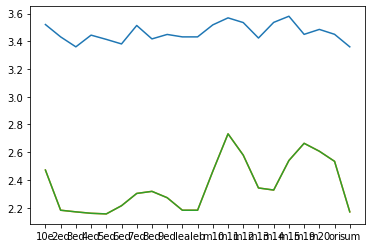

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

pt = sc.pivot_table(values = ["power", "toughness", "cmc"], index = "set")
plt.plot(pt)